In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("financial_fraud_dataset.csv")

# Display the first few rows
df.head()


,Transaction_ID,Customer_ID,Merchant_ID,Timestamp,Transaction_Type,Amount,IP_Address,Is_Fraud
0,1,1244,845,2255025,Online,46.93,192.168.175.43,0
1,2,5572,970,1156758,ATM,301.01,NaN,0
2,3,1614,630,1995310,Online,131.67,192.168.163.27,0
3,4,1249,547,1907714,Online,91.29,192.168.24.200,0
4,5,7620,633,1525734,POS,16.96,NaN,0


In [4]:
# Check dataset information
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    10000 non-null  int64  
 1   Customer_ID       10000 non-null  int64  
 2   Merchant_ID       10000 non-null  int64  
 3   Timestamp         10000 non-null  int64  
 4   Transaction_Type  10000 non-null  object 
 5   Amount            10000 non-null  float64
 6   IP_Address        6013 non-null   object 
 7   Is_Fraud          10000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


Transaction_ID         0
Customer_ID            0
Merchant_ID            0
Timestamp              0
Transaction_Type       0
Amount                 0
IP_Address          3987
Is_Fraud               0
dtype: int64

In [10]:
# Drop rows with missing values in critical columns (if needed)
df = df.dropna()

# Fill missing IP addresses with 'Unknown' (for Online transactions)
#df["IP_Address"].fillna("Unknown", inplace=True) ---> gave me error "Pandas is moving away from inplace operations"
df["IP_Address"] = df["IP_Address"].fillna("Unknown")

# Display the first few rows after fixing missing values
df.head()


,Transaction_ID,Customer_ID,Merchant_ID,Timestamp,Transaction_Type,Amount,IP_Address,Is_Fraud
0,1,1244,845,2255025,Online,46.93,192.168.175.43,0
2,3,1614,630,1995310,Online,131.67,192.168.163.27,0
3,4,1249,547,1907714,Online,91.29,192.168.24.200,0
7,8,1510,1498,1615381,Online,201.12,192.168.46.100,0
8,9,6968,816,250714,Online,91.91,192.168.22.74,0


In [12]:
import datetime

# Convert Timestamp to readable datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')

# Display first few rows after conversion
df.head()


,Transaction_ID,Customer_ID,Merchant_ID,Timestamp,Transaction_Type,Amount,IP_Address,Is_Fraud
0,1,1244,845,1970-01-27 02:23:45,Online,46.93,192.168.175.43,0
2,3,1614,630,1970-01-24 02:15:10,Online,131.67,192.168.163.27,0
3,4,1249,547,1970-01-23 01:55:14,Online,91.29,192.168.24.200,0
7,8,1510,1498,1970-01-19 16:43:01,Online,201.12,192.168.46.100,0
8,9,6968,816,1970-01-03 21:38:34,Online,91.91,192.168.22.74,0


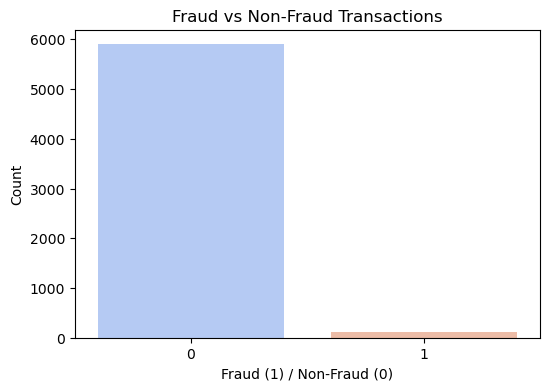

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of fraud vs. non-fraud
plt.figure(figsize=(6, 4))
#sns.countplot(x="Is_Fraud", data=df, palette="coolwarm") -->error  hue="Is_Fraud" ensures that the color palette applies correctly.legend=False prevents unnecessary legends.
sns.countplot(x="Is_Fraud", data=df, hue="Is_Fraud", palette="coolwarm", legend=False) 
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud (1) / Non-Fraud (0)")
plt.ylabel("Count")
plt.show()


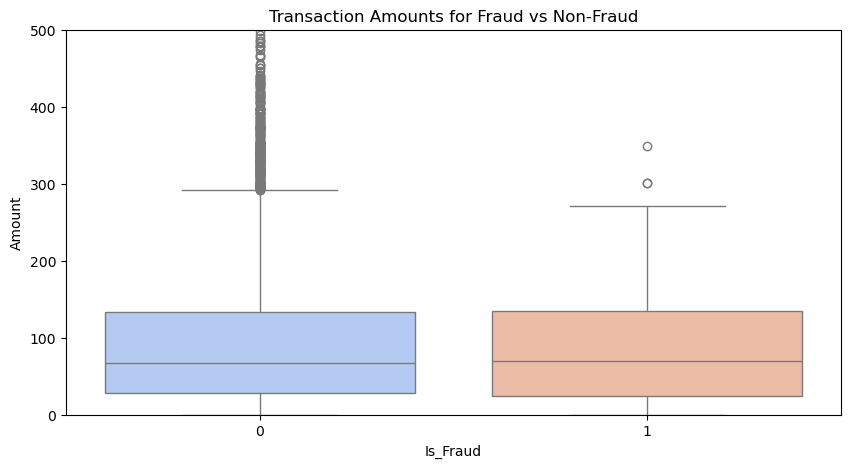

In [24]:
# Compare fraud and non-fraud transaction amounts
plt.figure(figsize=(10, 5))
sns.boxplot(x="Is_Fraud", y="Amount", data=df, palette="coolwarm" , hue="Is_Fraud", legend=False )
plt.title("Transaction Amounts for Fraud vs Non-Fraud")
plt.ylim(0, 500)  # Limit to focus on most transactions
plt.show()


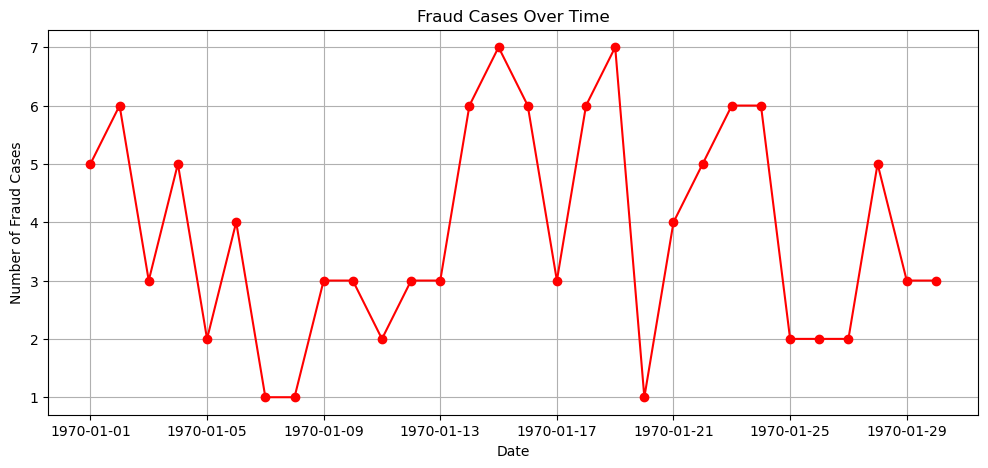

In [26]:
# Convert timestamp to date format
df["Date"] = df["Timestamp"].dt.date

# Aggregate fraud cases per day
fraud_trends = df[df["Is_Fraud"] == 1].groupby("Date").size()

# Plot fraud trends
plt.figure(figsize=(12, 5))
fraud_trends.plot(kind="line", marker="o", color="red")
plt.title("Fraud Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Fraud Cases")
plt.grid(True)
plt.show()


In [28]:
import sqlite3

# Create SQLite database
conn = sqlite3.connect(":memory:")
df.to_sql("transactions", conn, index=False, if_exists="replace")


6013

In [30]:
query = """
SELECT Customer_ID, COUNT(*) AS Fraud_Transactions
FROM transactions
WHERE Is_Fraud = 1
GROUP BY Customer_ID
ORDER BY Fraud_Transactions DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,Customer_ID,Fraud_Transactions
0,8806,2
1,9979,1
2,9877,1
3,9834,1
4,9754,1
5,9647,1
6,9509,1
7,9357,1
8,9267,1
9,9259,1


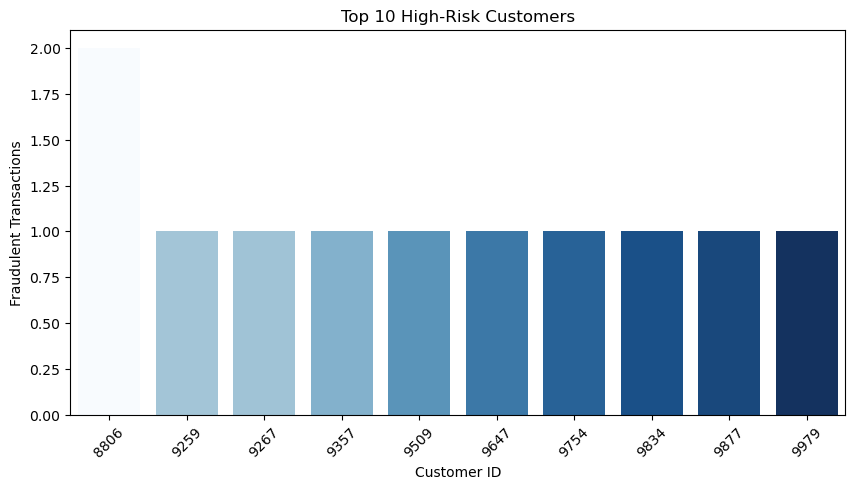

In [80]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Customer_ID", y="Fraud_Transactions", data=high_risk_customers, hue="Customer_ID", palette="Blues", dodge=False)
plt.xticks(rotation=45)
plt.xlabel("Customer ID")
plt.ylabel("Fraudulent Transactions")
plt.title("Top 10 High-Risk Customers")
plt.legend([],[], frameon=False)  # Removes legend if not needed
plt.show()


In [88]:
query = """
SELECT Merchant_ID, COUNT(*) AS Fraud_Count
FROM transactions
WHERE Is_Fraud = 1
GROUP BY Merchant_ID
ORDER BY Fraud_Count DESC
LIMIT 10;
"""
high_risk_merchants = pd.read_sql(query, conn)

# Display results
high_risk_merchants


,Merchant_ID,Fraud_Count
0,1439,2
1,1396,2
2,1372,2
3,1116,2
4,1095,2
5,1038,2
6,982,2
7,795,2
8,765,2
9,506,2


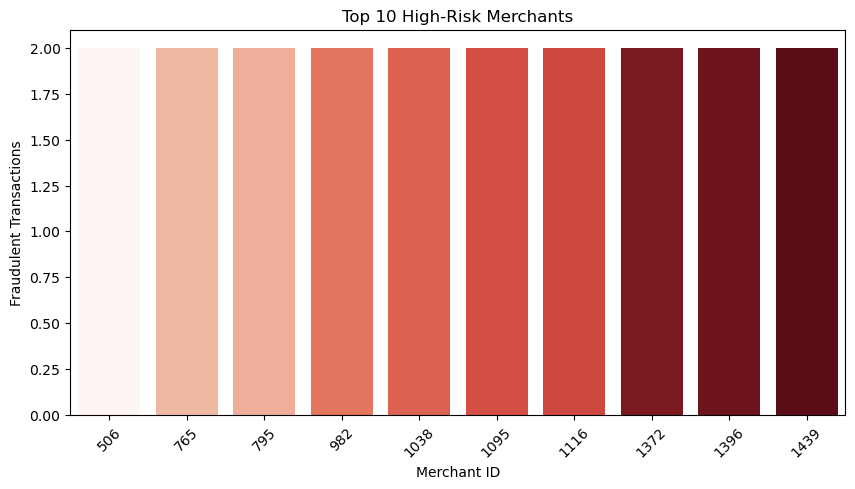

In [86]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Merchant_ID", y="Fraud_Count", data=high_risk_merchants, hue="Merchant_ID", palette="Reds", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Merchant ID")
plt.ylabel("Fraudulent Transactions")
plt.title("Top 10 High-Risk Merchants")
plt.show()


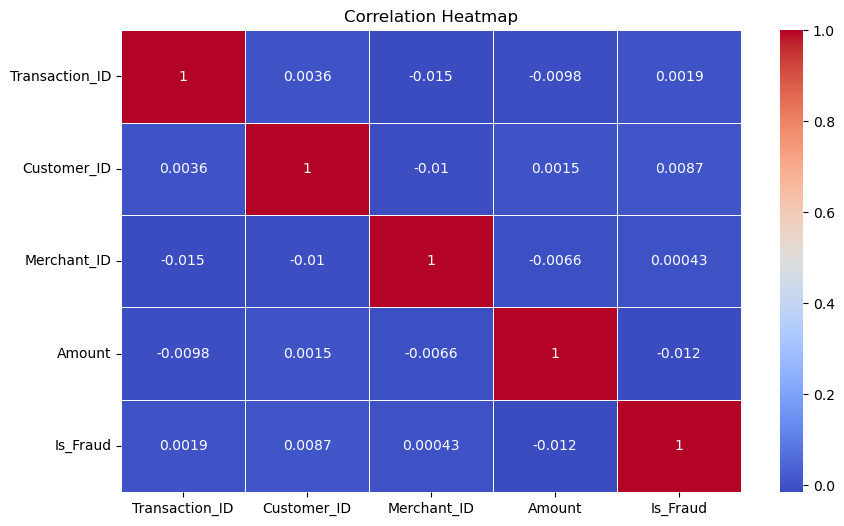

In [54]:
# Drop non-numeric columns, including 'IP_Address' and 'Date' non-numeric columns
df_corr = df_encoded.drop(columns=["Transaction_Type", "IP_Address", "Date", "Timestamp"], errors="ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# Generate and plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
